# **Indíces de queimadas no Brasil nos últimos 5 anos**
O monitoramento de queimadas e incêndios florestais em imagens de satélites é particularmente útil para regiões remotas sem meios intensivos e locais de acompanhamento, condição esta que representa a situação geral do País. Para uma área com torres de observação guarnecidas continuamente e mantendo comunicação direta com brigadas de combate de fogo, os dados de satélite têm interesse marginal.

A detecção dos focos de queima de vegetação nas imagens utiliza um mesmo modo de identificação de fogo, em todas regiões, todos os dias e por anos seguidos, o que permite análises temporais e espaciais da ocorrência do fogo que seriam impossíveis de outra forma, dada a precariedade, descontinuidade e diferença de métodos nas fontes de informação locais.  Em particular, os dados do "satélite de referência" permitem a comparação entre qualquer país do Planeta. 

In [39]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
#Importando bibliotecas
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from collections import Counter
import statistics as static
import plotly.express as px
import plotly.graph_objects as go
import folium
import sys

sys.setrecursionlimit(1000000000)

In [41]:
#exibir dados no gráfico em barras horizontais
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 5, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# **Importando o Dataset**

In [42]:
#Importando Datasets
dados = pd.read_csv('/content/17a21.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
florestas_queimadas = dados.query("estado != 0")
florestas_queimadas.head()

,ano,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021,17/04/2021 17:35,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOSSOROCA,Pampa,2.0,0.4,0.0,-28.748,-55.059,3.1
1,2021,17/04/2021 17:40,AQUA_M-T,Brasil,MATO GROSSO,CANABRAVA DO NORTE,Cerrado,0.0,5.2,0.0,-11.255,-51.546,29.2
2,2021,17/04/2021 17:40,AQUA_M-T,Brasil,MATO GROSSO,NOVA MARINGA,Amazonia,3.0,0.8,0.2,-12.827,-57.368,9.0
3,2021,17/04/2021 17:40,AQUA_M-T,Brasil,MATO GROSSO,NOVA MARINGA,Amazonia,3.0,2.7,0.1,-12.553,-57.314,11.3
4,2021,17/04/2021 17:40,AQUA_M-T,Brasil,RONDONIA,PIMENTA BUENO,Amazonia,2.0,9.3,0.0,-11.637,-61.269,4.2


# **Dados por Região**

In [44]:
#divindo as regiões por bioma
estado = {'Nordeste': ['ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO', 'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE'],
                'Norte': ['AMAZONAS', 'RORAIMA', 'AMAPA', 'PARA', 'TOCANTINS', 'RONDONIA', 'ACRE'],
                'Centro Oeste': ['MATO GROSSO', 'MATO GROSSO DO SUL', 'GOIANIA'], 
                'Sudeste': ['SAO PAULO', 'RIO DE JANEIRO', 'ESPIRITO SANTO', 'MINAS GERAIS'],
                'Sul': ['PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA']}
bioma = ['Amazonia', 'Caatinga','Cerrado', 'Mata Atlantica', 'Pampa', 'Pantanal']
dic_01 = {i: [ len([k for k in list(dados.loc[dados['bioma'] == i, ['estado']]['estado'])
                    if k in estado[j]]) for j in estado.keys()] for i in bioma}

dic_01['Região'] = list(estado.keys())
dados_regioes = pd.DataFrame(dic_01)

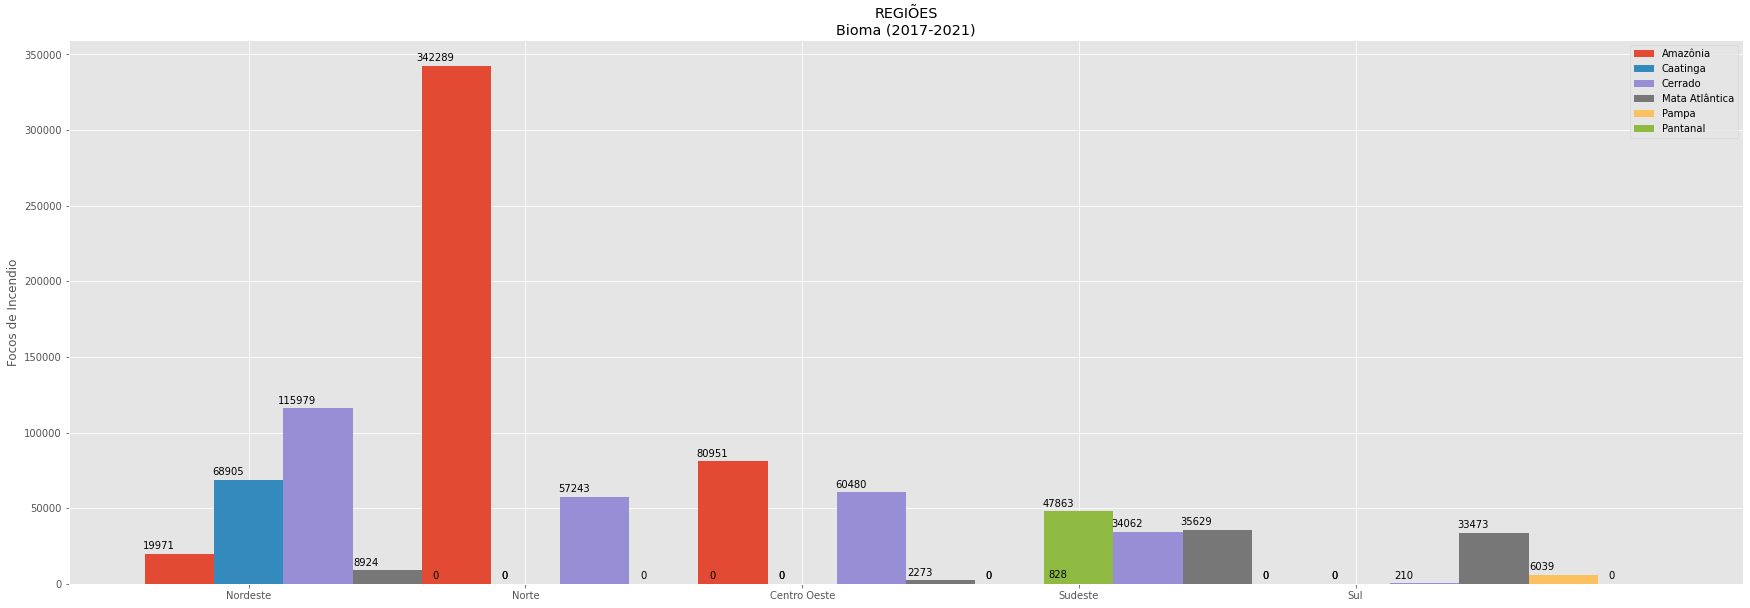

In [45]:
#Quantidade de focos de incendio por região em cada bioma
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(30, 10))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]
r4 = [ x + width for x in r3]
r5 = [ x + width for x in r4]
r6 = [ x + width for x in r5]

rects1 = ax.bar(r1, dados_regioes['Amazonia'], width, label='Amazônia')
rects2 = ax.bar(r2, dados_regioes['Caatinga'], width, label='Caatinga')
rects3 = ax.bar(r3, dados_regioes['Cerrado'], width, label='Cerrado')
rects4 = ax.bar(r4, dados_regioes['Mata Atlantica'], width, label='Mata Atlântica')
rects5 = ax.bar(r5, dados_regioes['Pampa'], width, label='Pampa')
rects6 = ax.bar(r6, dados_regioes['Pantanal'], width, label='Pantanal')

ax.set_ylabel('Focos de Incendio')
ax.set_title('REGIÕES\nBioma (2017-2021)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)
numero_em_cima(rects3, ax)
numero_em_cima(rects4, ax)
numero_em_cima(rects5, ax)
numero_em_cima(rects6, ax)

plt.show()

In [46]:
ano = Counter(dados['ano'])
mes_ano = sorted(ano, key = ano.get, reverse = False)
contador_ano = sorted(list(ano.values()), reverse = True)

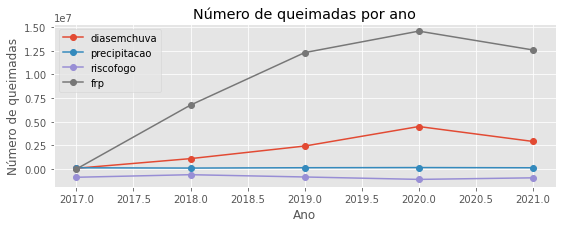

In [47]:
florestas_queimadas.groupby(["ano"]).sum().plot(figsize = (9, 3), marker = "o")

x=mes_ano
y=contador_ano

plt.title("Número de queimadas por ano")
plt.xlabel("Ano")
plt.ylabel("Número de queimadas")

plt.show()

# **Estados mais afetados**

In [48]:
estado = Counter(dados['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

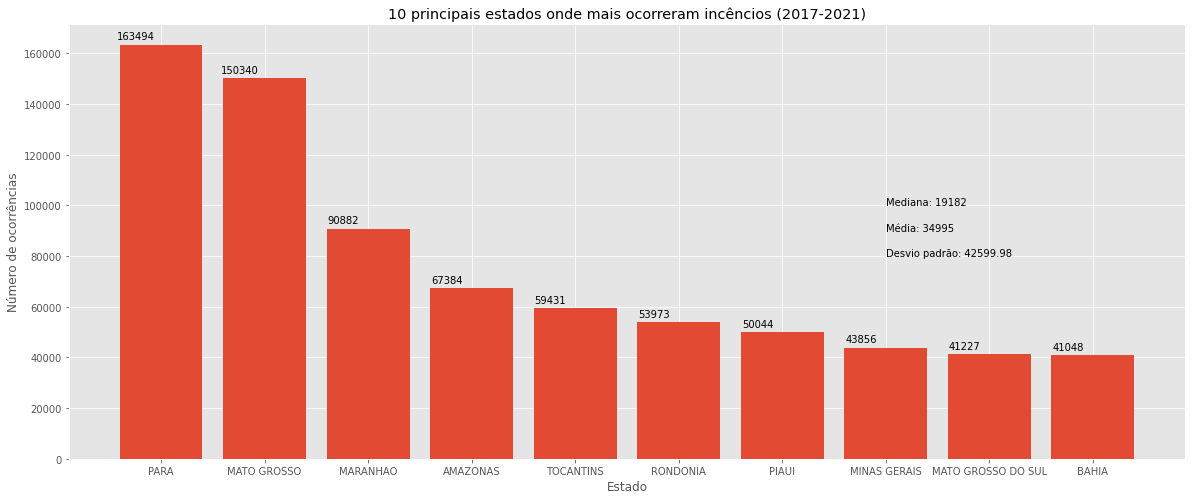

In [49]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(20, 8))

x=fase_estado[:10]
y=contador_estado[:10]

rects1=ax.bar(x, y,)

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.xlabel("Estado")
plt.title('10 principais estados onde mais ocorreram incêncios (2017-2021)')
plt.text(7, 100000.10, 'Mediana: %d'%(np.median(np.array(contador_estado))))
plt.text(7, 90000.10, 'Média: %d'%(np.mean(np.array(contador_estado))))
plt.text(7, 80000.9, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   

numero_em_cima(rects1, ax)

plt.show()

# **Porcentagem de focos de incêndios por tipo de bioma**

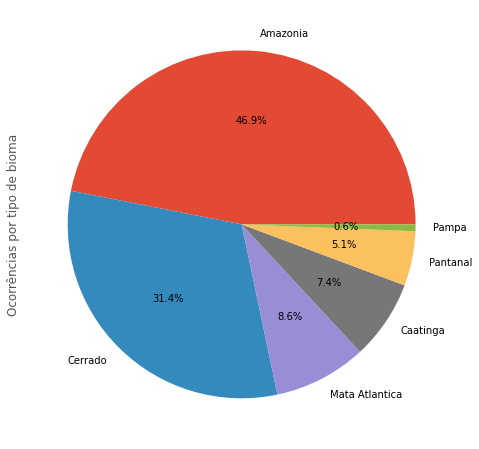

In [50]:
plt.style.use("ggplot")

dados['bioma'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Ocorrências por tipo de bioma" ,figsize=(8, 8))
plt.show()

Segundo o IPAM (Instituto Ambiental da Amazônia), existem 3 motivos principais que são os causadores das queimadas no Brasil:

**1. Fogo de manejo agropecuário:** empregado por produtores rurais grandes, médios e pequenos, inclusive por populações tradicionais, para limpar o terreno de pragas e renovar o solo. Acontece principalmente em áreas de pastagem e é sempre intencional;

**2. Fogo de desmatamento recente:** queimar a vegetação derrubada é mais barato do que retirá-la com tratores; além disso, as cinzas ajudam a nutrir o solo amazônico para o plantio de pasto, por exemplo. É sempre intencional;

**3. Incêndios florestais:** é o fogo que pega a floresta viva, espalhando-se rapidamente pelas folhas secas depositadas no solo. Pode ser acidental, quando escapa de uma queimada próxima, ou intencional, quando colocado propositalmente com a intenção de degradar a floresta.

# **Dias e horários onde mais incêncidios foram reportados**

In [51]:
datahora = Counter(dados['datahora'])
fase_hora = sorted(datahora, key = datahora.get, reverse = True)
contador_datahora = sorted(list(datahora.values()), reverse = True)

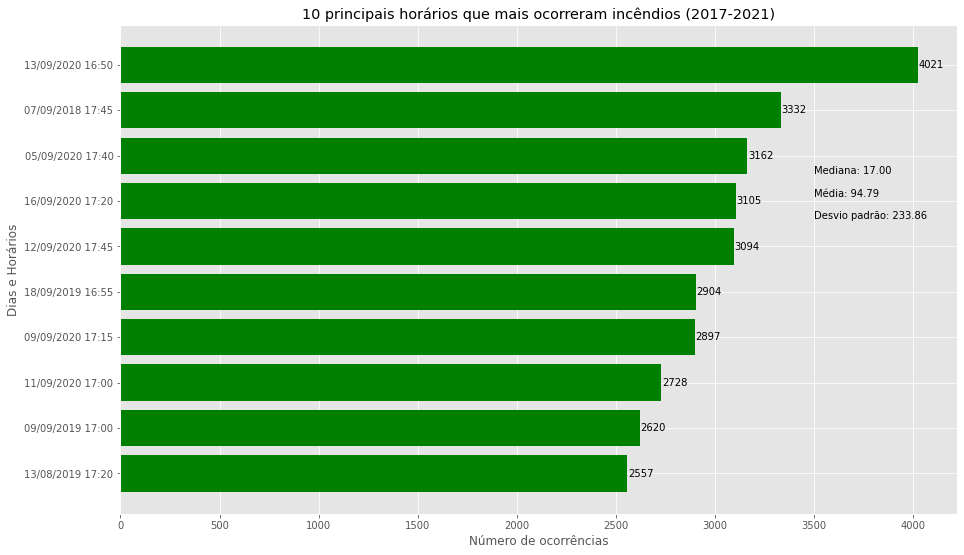

In [52]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(15, 9))

x=fase_hora[:10]
y=contador_datahora[:10]

ax.barh(x, y, color='green')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()

plt.xlabel('Número de ocorrências')
plt.ylabel('Dias e Horários')
plt.title('10 principais horários que mais ocorreram incêndios (2017-2021)')

plt.text(3500, 2.4, 'Mediana: %.2f'%(np.median(np.array(contador_datahora))))
plt.text(3500, 2.9, 'Média: %.2f'%(np.mean(np.array(contador_datahora))))
plt.text(3500, 3.4, 'Desvio padrão: %.2f'%(static.stdev(contador_datahora)))


plt.show()

# **Visualização no mapa do Brasil para os estados mais afetados**

In [67]:
latitude = dados['latitude']
longitude = dados['longitude']

In [ ]:
folium.Map(
    location=[-15.083, -47.086],
    tiles='Stamen Terrain',
    zoom_start=5
    )

for lat, lon in zip(latitude, longitude):
    folium.Marker(location=[float(lat), float(lon)]).add_to(mapa)

# **Referências bibliográficas**
IPAM, Instituto Ambiental da Amazônia. **Tudo o que você queria saber sobre fogo na Amazônia, mas não sabia para quem perguntar**. 2020. Disponível em: https://ipam.org.br/cartilhas-ipam/tudo-o-que-voce-queria-saber-sobre-fogo-na-amazonia-mas-nao-sabia-para-quem-perguntar/. Acesso em: 09/05/2022.

INPE, Instituto Nacional de Pesquisas Espaciais. **Programa Queimadas** Disponível em: https://queimadas.dgi.inpe.br/queimadas/portal. Acesso em: 10/05/2022.

